## 24. Разделимые наименьшие квадраты

[Каханер–Моулер–Нэш] 

Пусть необходимо аппроксимировать $m$ точек данных $(t_i,\, y_i)$ $(i=1,2,\dots,m)$ с помощью функции
$$
   b(t) = c_1 + c_2 t + c_3 t^2 + c_4 e^{\lambda t}.
$$
Параметры $c_1,\dots,c_4$ входят линейно, а $\lambda$ нелинейно.
Рассмотрим матрицу
$$
A(\lambda) =
\left(
\begin{array}{cccc}
    1 & t_1 & t_1^2 & e^{\lambda t_1}  \\
    1 & t_2 & t_2^2 & e^{\lambda t_2}  \\
    \vdots & \vdots & \vdots & \vdots  \\
    1 & t_m & t_m^2 & e^{\lambda t_m}  \\
\end{array}
\right)
$$
и векторы
$$
y = 
\left(
\begin{array}{c}
   y_1 \\ y_2 \\ \vdots \\ y_m
\end{array}
\right),
\qquad
c = 
\left(
\begin{array}{c}
   c_1 \\ c_2 \\ c_3\\ c_4
\end{array}
\right).
$$
Тогда задачу наименьших квадратов можно поставить следующим образом:
$$
\min_{\lambda}  \min_{c}  \|A(\lambda) c - y\|_2.
$$
Для любого заданного $\lambda$ внутренний минимум можно найти линейным методом наименьших квадратов.
Для нахождения внешнего минимума можно воспользоваться методом одномерной минимизации.

В таблице ниже приведены две группы данных, к которым необходимо применить описанный подход.
Единственным ли образом определяются неизвестные параметры?
Изобразите данные на графике и постройте графики построенных моделей.

```
       t        y         y
             Группа 1  Группа 2
 -----------------------------------
     0.00     20.00     20.00
     0.25     51.58     24.13
     0.50     68.73     26.50
     0.75     75.46     27.13
     1.00     74.36     26.00
     1.25     67.09     23.13
     1.50     54.73     18.50
     1.75     37.98     12.13
     2.00     17.28      4.00
```

#### Подключение библиотек

In [24]:
import numpy as np
from scipy import linalg, optimize
import matplotlib.pyplot as plt
%matplotlib inline

#### Данные

In [25]:
x_t = np.array([0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00])

y_1 = np.array([20.00, 51.58, 68.73, 75.46, 74.36, 67.09, 54.73, 37.98, 17.28])
y_2 = np.array([20.00, 24.13, 26.50, 27.13, 26.00, 23.13, 18.50, 12.13, 4.00])

In [26]:
m = len(x_t)

#### Инициализация модели

In [27]:
def A(t, l):
    matrix = np.ones((len(t), 4))
    matrix[:, 1] = t
    matrix[:, 2] = t ** 2
    matrix[:, 3] = np.e ** (t * l)
    return matrix

def b(t, c, l):
    return c[0] + c[1] * t + c[2] * (t ** 2) + c[3] * (np.e ** (l * t))

#### Изображение имеющихся данных

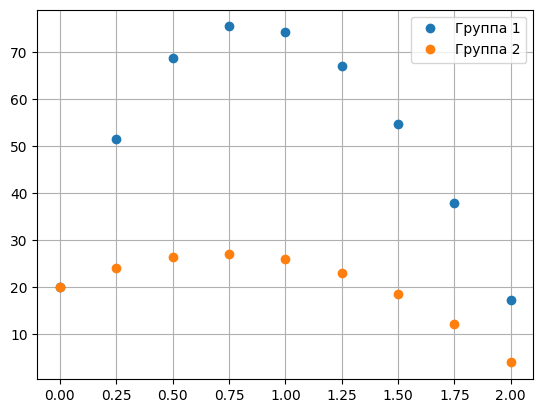

In [28]:
plt.grid()
plt.plot(x_t, y_1, 'o', color='tab:blue',   label='Группа 1')
plt.plot(x_t, y_2, 'o', color='tab:orange', label='Группа 2')
plt.legend()
pass

#### Оптимизация

Изобразим на графике зависимость сумм квадратов невязок внутренней функции, то есть функции, которую мы собираемся минимизировать, от параметра $\lambda$.

Учитывая, что в таком случае $\lambda$ - постоянная величина, функция линейна, значит, к ней можно применить метод наименьших квадратов.

In [29]:
def b_approx_l(x_l, x_t, y):
    y_approx = []
    for l in x_l:
        c, residuals, rank, sv = linalg.lstsq(A(x_t, l), y)
        y_approx.append(np.sum((b(x_t, c, l) - y) ** 2))
    return np.array(y_approx)

In [30]:
x_l = np.arange(-5.0, 5.0, 0.01)
x_t_test = np.arange(min(x_t), max(x_t), 0.01, dtype=float)

##### Группа №1

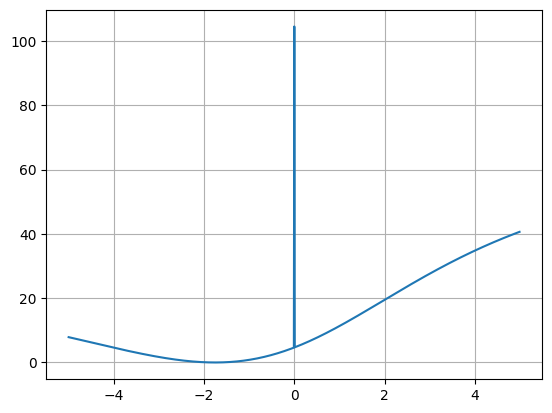

In [31]:
plt.grid()
plt.plot(x_l, b_approx_l(x_l, x_t, y_1), color='tab:blue')
pass

Видно, что внешний минимум находится где-то около $-2$.

Его можно найти с помощью одномерной оптимизации методом `bounded` - так мы точно не выйдем за границы.

In [32]:
l1 = optimize.minimize_scalar(lambda l : b_approx_l([l], x_t, y_1),
    bounds=[min(x_l), max(x_l)], method='bounded').x[0]
l1

-1.7528813847807136

Внутренний минимум:

In [33]:
c1, residuals, rank, sv = linalg.lstsq(A(x_t, l1), y_1)
c1

array([109.72907967,   5.2312082 , -25.05435049, -89.72891433])

Теперь мы можем построить график и увидеть точность нашей модели:

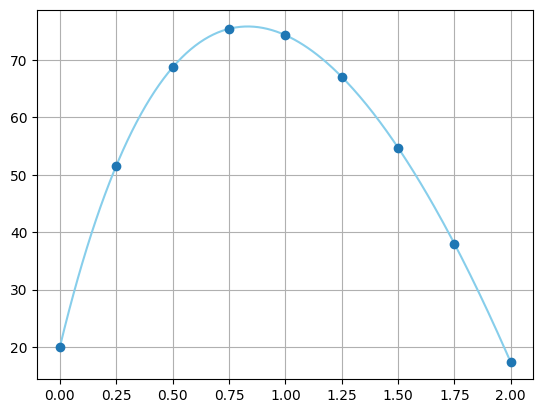

In [34]:
plt.grid()
plt.plot(x_t_test, b(x_t_test, c1, l1), color='skyblue')
plt.plot(x_t, y_1, 'o', color='tab:blue')
pass

##### Группа №2

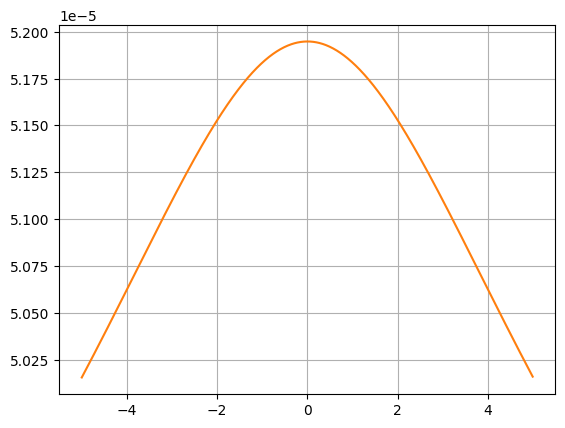

In [35]:
plt.grid()
plt.plot(x_l, b_approx_l(x_l, x_t, y_2), color='tab:orange')
pass

Как мы видим, минимума, по крайней мере в промежутке $[-5.0;5.0]$, нет.

Тогда попробуем взять промежуток побольше, например, $[-50.0;50.0]$.

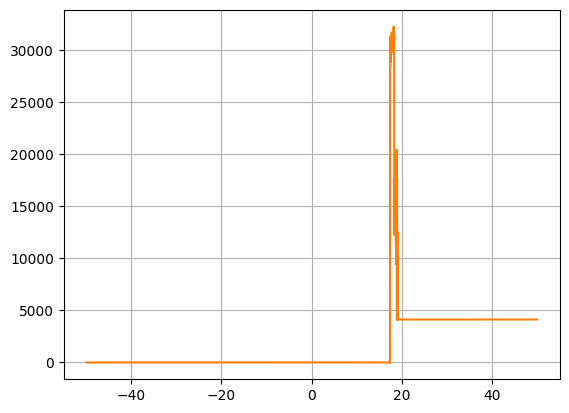

In [36]:
x_l_wide = np.arange(-50.0, 50.0, 0.01)

plt.grid()
plt.plot(x_l_wide, b_approx_l(x_l_wide, x_t, y_2), color='tab:orange')
pass

Судя по всему, функция возрастает на промежутке от $-\infty$ до условного $N$, убывает, вновь возрастает, и снова убывает, пока ее значение не стабилизируется на уровне где-то между $2500$ и $5000$.

В таком случае $\lambda$ нам нужно выбрать самостоятельно, скорее всего, оптимальное значение $\lambda$ приближено к $-\infty$.

Проверим наши предположения, построив график сначала для промежутка $[20.0;100.0]$, а затем для промежутка $[-100.0;-40.0]$.

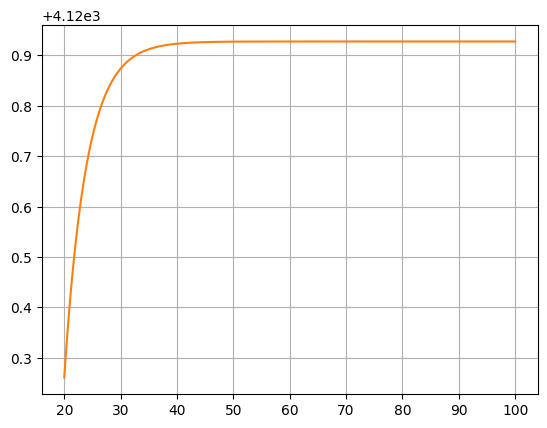

In [37]:
x_l_wide2 = np.arange(20.0, 100.0, 0.01)

plt.grid()
plt.plot(x_l_wide2, b_approx_l(x_l_wide2, x_t, y_2), color='tab:orange')
pass

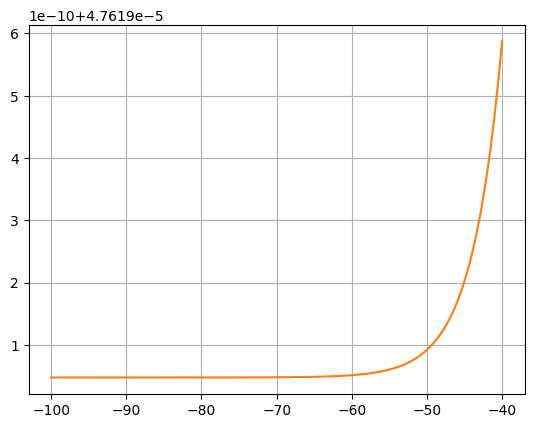

In [38]:
x_l_wide2 = np.arange(-100.0, -40.0, 0.01)

plt.grid()
plt.plot(x_l_wide2, b_approx_l(x_l_wide2, x_t, y_2), color='tab:orange')
pass

Наше предположение верно. Рост функции квадрата невязок, которую мы изобразили на графиках - бесконечно медленный, поэтому можно спокойно взять $0$ как $\lambda$.

In [39]:
l2 = 0
l2

0

Внутренний минимум:

In [40]:
c2, residuals, rank, sv = linalg.lstsq(A(x_t, l2), y_2)
c2

array([ 10.00060606,  20.0034632 , -14.0017316 ,  10.00060606])

Наконец, построим график модели:

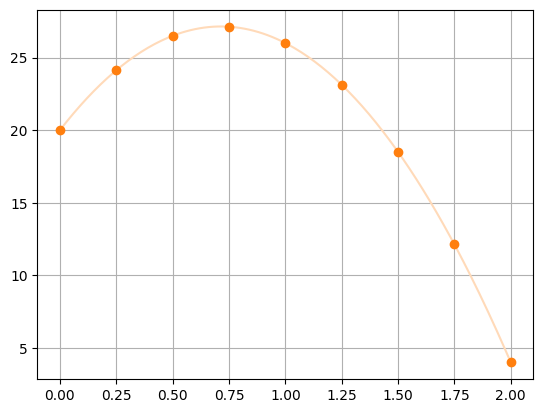

In [41]:
plt.grid()
plt.plot(x_t_test, b(x_t_test, c2, l2), color='peachpuff')
plt.plot(x_t, y_2, 'o', color='tab:orange')
pass

#### Результат

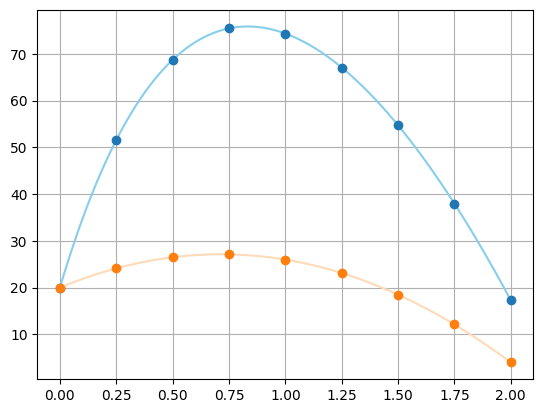

In [42]:
plt.grid()

plt.plot(x_t_test, b(x_t_test, c1, l1), color='skyblue')
plt.plot(x_t, y_1, 'o', color='tab:blue')

plt.plot(x_t_test, b(x_t_test, c2, l2), color='peachpuff')
plt.plot(x_t, y_2, 'o', color='tab:orange')

pass

##### Вывод

Неизвестные параметры для первой группы определяются единственным образом - для первой группы существует определенный внешний минимум.

Для второй группы неизвестные параметры определяются бесконечным числом способов, т.к. внешний минимум для неё не определен и стремится к $-\infty$.